# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [1]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [2]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [3]:
num_x = 10000
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

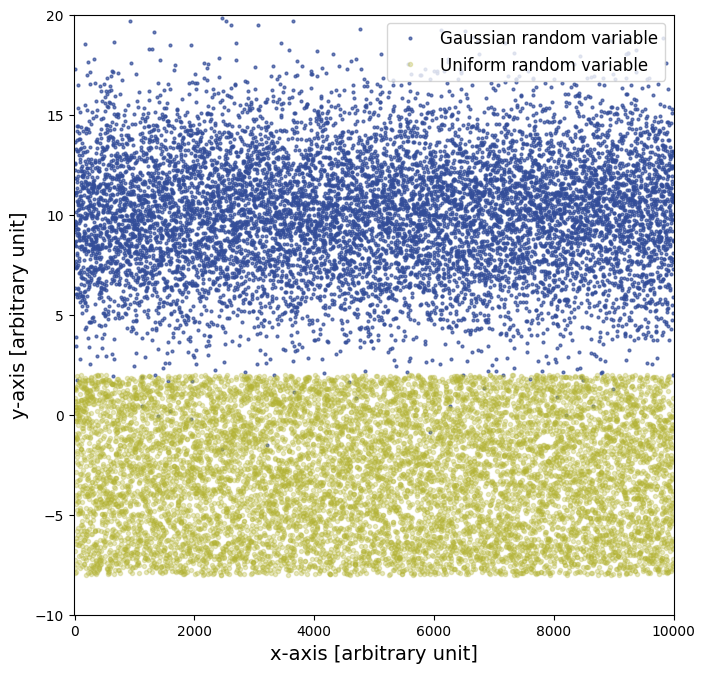

In [4]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

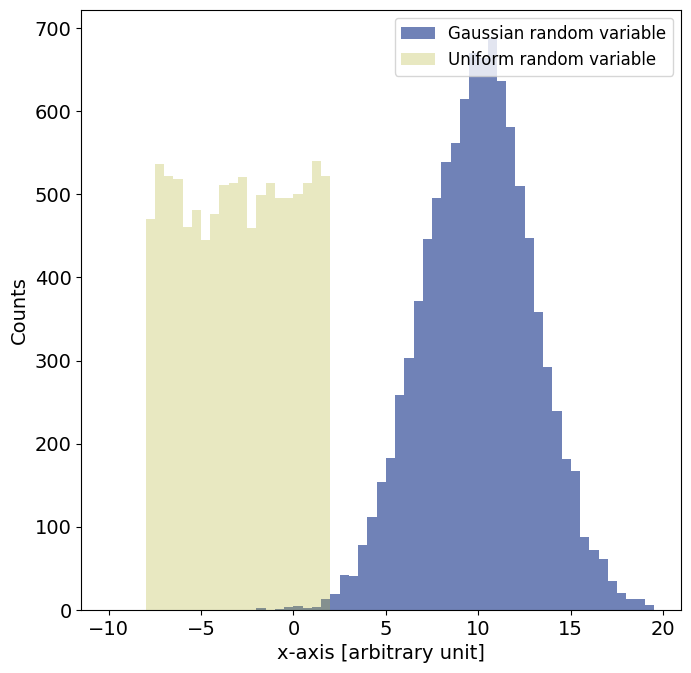

In [5]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [6]:
num_x = 100
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[1031.88842186  543.17763945  435.36968369  231.31876598 1009.87842374
  845.79071184  745.01670538  868.34075184  550.25793282  623.03794459
  889.80804963  126.83124484  446.75850723  121.84306111  715.45284499
  444.01288414  254.46210946  321.53478665  657.52676015  797.53857705
  542.69643627  414.19550529  527.11681435  134.41400135  958.77551387
  202.0295478   765.79750898  266.48895682  330.58575757  489.15795797
  724.7338201   168.22642949  463.22552962  134.12319406 1030.25884346
  940.42595849  846.52628851 1003.5244633   631.78375631  745.91796918
 1090.64219442  211.15074868  333.15642627  788.95791792  622.96531938
  327.73999041  336.70061368  409.8717106   821.77975422  462.08293636
  137.48432332  665.64236597  580.72572805  813.56762535 1008.47601971
  621.22836659 1004.03771497  975.54906652  597.87592316  637.77074358
  636.25903914  161.77471569  388.62349588  174.30287446  575.92789631
 1063.05331692  954.18842202  383.63541803  674.18326189  710.14162094
  239.

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [7]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [8]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[96.83645599 44.98121182 33.83682105 19.66849521 88.57596751 74.42433284
 67.23319035 82.77855585 47.50530414 54.69735992 78.62811991  3.89901898
 38.80888283  6.77203676 63.43014603 30.36217891 20.28867166 21.54030623
 52.92121084 67.90616375 41.04468363 25.05162664 41.98441729  3.14201436
 89.67074983  5.15663532 67.77314351 12.6195855  24.81939058 37.36917521
 59.078551    7.07736802 38.39530882  9.83323793 92.62741938 89.60300892
 76.20940095 91.50958191 55.09471929 68.29728745 95.96008033 13.47375361
 24.99788419 68.1663784  51.92807399 22.51600774 24.73737651 34.05214926
 74.74773769 37.24008501  4.11258327 55.80524407 47.82572703 59.901218
 85.41210466 52.28872928 86.63415647 85.03970554 51.38850808 54.29902997
 50.48399996  1.69883673 28.19883761  3.76424044 43.37452161 94.74832443
 86.58103006 32.61581861 57.68539969 62.19763579 14.62478407 48.67144691
 24.21195246 42.92577689 67.97032716 87.32258114 51.79811798 82.79112301
 36.68215068  7.18137401 88.727

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [9]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

            x            y  y_err
0   96.836456  1031.888422   30.0
1   44.981212   543.177639   30.0
2   33.836821   435.369684   30.0
3   19.668495   231.318766   30.0
4   88.575968  1009.878424   30.0
..        ...          ...    ...
95  92.411489  1041.887997   30.0
96  53.582123   622.948783   30.0
97  22.064611   240.427936   30.0
98   1.125487    92.038481   30.0
99  65.388348   726.672671   30.0

[100 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [10]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

            x            y  y_err
0   96.836456  1031.888422   30.0
1   44.981212   543.177639   30.0
2   33.836821   435.369684   30.0
3   19.668495   231.318766   30.0
4   88.575968  1009.878424   30.0
..        ...          ...    ...
95  92.411489  1041.887997   30.0
96  53.582123   622.948783   30.0
97  22.064611   240.427936   30.0
98   1.125487    92.038481   30.0
99  65.388348   726.672671   30.0

[100 rows x 3 columns]


In [11]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0     96.836456
1     44.981212
2     33.836821
3     19.668495
4     88.575968
        ...    
95    92.411489
96    53.582123
97    22.064611
98     1.125487
99    65.388348
Name: x, Length: 100, dtype: float64
 
0     1031.888422
1      543.177639
2      435.369684
3      231.318766
4     1009.878424
         ...     
95    1041.887997
96     622.948783
97     240.427936
98      92.038481
99     726.672671
Name: y, Length: 100, dtype: float64


#### 2.3.3 Plotting the loaded data

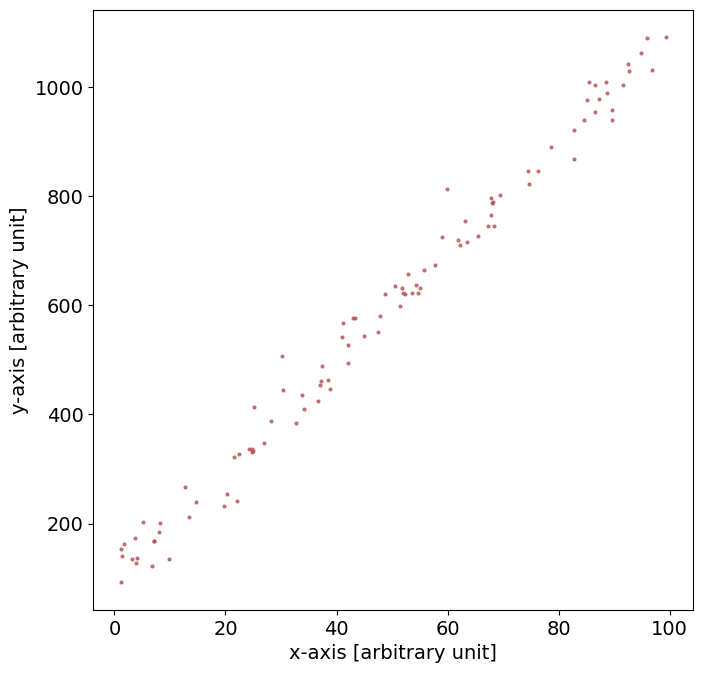

In [12]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### 3.1 Home made code to fit the 1D polynomial model

Best-fit a:  9.984073208531626   Best-fit b:  101.38579867106579
a error:  0.11560754894762894   b error : 6.445750077700396


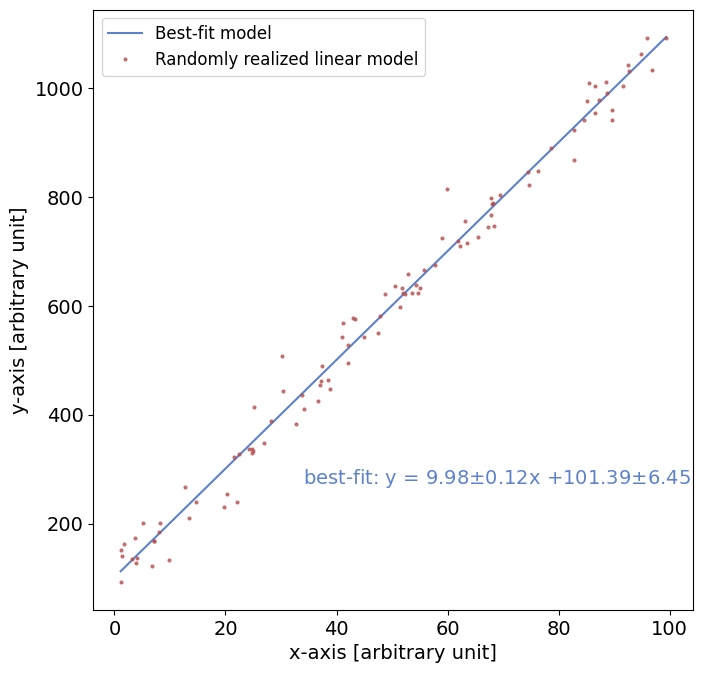

In [13]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

'''
popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])
'''

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
'''
x_sort = np.sort(x)
plt.plot(x_sort, myline(x_sort, popt[0], popt[1]),
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
'''

# plot data
plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('HM_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.2 Scipy fitting of the 1D polynomial model

Best-fit a:  9.984073208531626   Best-fit b:  101.38579867106579
a error:  0.11560754894762894   b error : 6.445750077700396


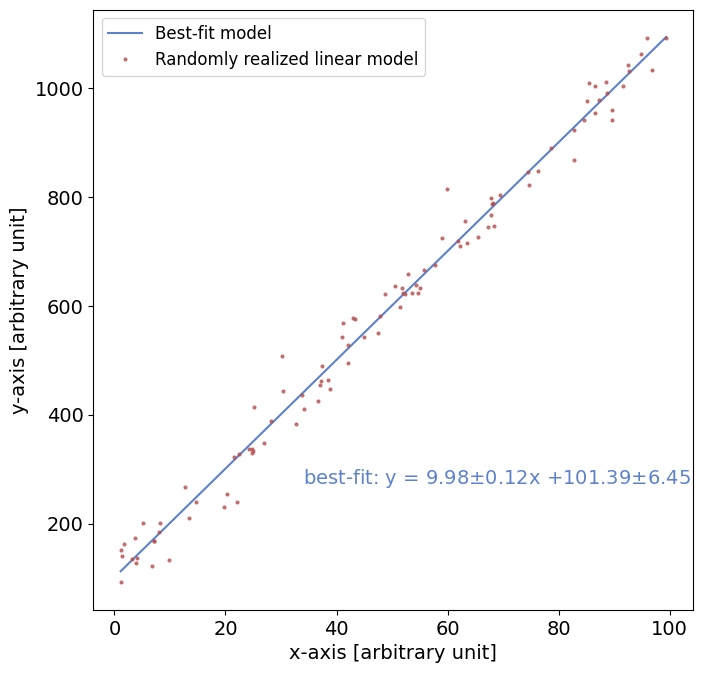

In [14]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
x_sort = np.sort(x)
plt.plot(x_sort, myline(x_sort, popt[0], popt[1]),
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )

# plot data
plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.3 MCMC fitting of the 1D polynomial model
y = ax + b

In [15]:
# importing the package for MCMC fittings
import emcee, corner

In [16]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.3.1 Definining functions that are required in the MCMC model fittings

In [17]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if -1e10 < a < 1e10 and -1e10 < b < 1e10:
        return 0.0
    return -np.inf


def log_likelihood(parms, x, y, yerr):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    model = myline(x, a, b)
    
    ln_likelihood = -0.5 * (
                         np.sum(
                                ( ( y - model )**2 ) / yerr**2 
                               )
                        )
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.3.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [18]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 300 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

100%|███████████████████████████████████████████████████| 300/300 [00:02<00:00, 141.96it/s]


State([[  9.85916735 108.40119628]
 [  9.97504052 101.51369087]
 [  9.9074016  107.6881076 ]
 [ 10.03454745  94.0782248 ]
 [ 10.0091658   95.07847331]
 [  9.95057659  99.63610276]
 [ 10.12026753  97.71590545]
 [  9.76771139 105.24274036]
 [ 10.07840195  93.31538145]
 [  9.95423272 103.6446454 ]
 [ 10.04940347  98.12771515]
 [  9.87290244 108.35628209]
 [  9.84483056 106.58506838]
 [ 10.05431041  95.31900046]
 [  9.92121875 108.89417167]
 [  9.97686505 100.14871657]], log_prob=[-60.3695487  -59.60854772 -60.25250535 -61.04536654 -61.07711154
 -60.27515044 -60.89402529 -64.07410804 -60.70740232 -59.67857199
 -59.79486995 -60.31349611 -60.60092184 -60.23096159 -60.90485961
 -59.74109301], blobs=None, random_state=('MT19937', array([1609576761, 1803012491, 1205420610,  675532083,  259241956,
       3842292689,  364493009, 1018605913, 1982273300,  602202982,
       1059328689, 3726136531, 3332330289, 1490823554, 3114850150,
       1346105842, 2395245504, 2440695141, 3127947481, 3824934163,


#### 3.3.3 Plotting saplers

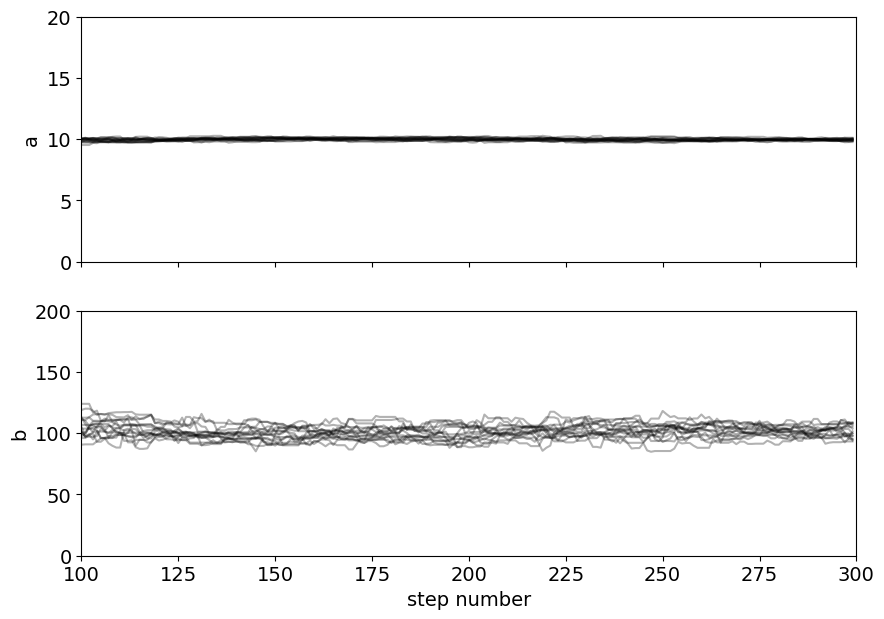

In [19]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.4 Making corner plot

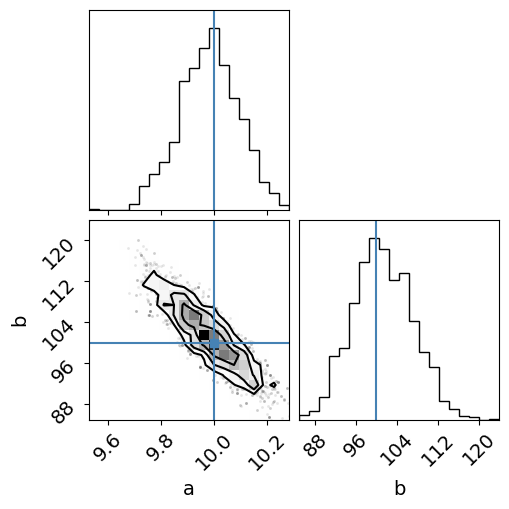

In [20]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.5 Summarizing the results of MCMC fittings

In [21]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 9.98-0.11/+0.11
b value is: 100.91-5.41/+6.27


#### 3.3.6 Plotting the MCMC fitting results

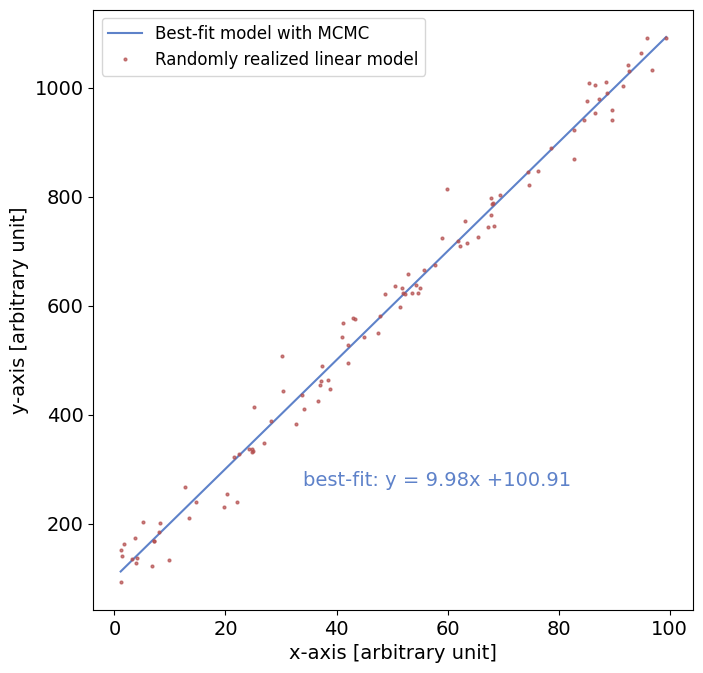

In [22]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot model
x_sort = np.sort(x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', markersize = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# plot data
plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )